# US Baby Names 1880-2010
## 1. prepare

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = '../Datasets/babynames'
os.listdir(path)

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [4]:
bNames = pd.DataFrame(columns=['name','sex','births','year'])
for year in range(1880,2011):
    dtPath = f"{path}/yob{year}.txt"
    tmp = pd.read_csv(dtPath,names=['name','sex','births'])
    tmp['year'] = year
    bNames = pd.concat([bNames,tmp],ignore_index=True)
bNames

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


## 2. 按性别划分的出生总数

In [5]:
total_births = bNames.pivot_table('births','year','sex','sum')
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


Text(0.5, 1.0, '出生人口总数')

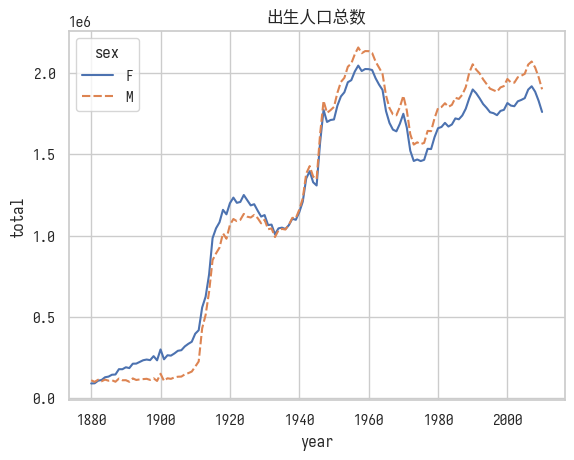

In [6]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=total_births)
plt.xlabel('year')
plt.ylabel('total')
plt.rcParams['font.sans-serif'] = ['Sarasa Mono SC']
plt.title('出生人口总数')

## 3.分析名字趋势

In [7]:
# col: 婴儿名字占出生人口的比例
def add_col(df):
    df['nameProp'] = df.births /df.births.sum()
    return df
bNames_p =bNames.copy()
bNames_p = bNames_p.groupby(['year','sex']).apply(add_col, include_groups = False)
bNames_p

name births  nameProp
year sex                                    
1880 F   0             Mary   7065  0.077643
         1             Anna   2604  0.028618
         2             Emma   2003  0.022013
         3        Elizabeth   1939  0.021309
         4           Minnie   1746  0.019188
...                     ...    ...       ...
2010 M   1690779    Zymaire      5  0.000003
         1690780     Zyonne      5  0.000003
         1690781  Zyquarius      5  0.000003
         1690782      Zyran      5  0.000003
         1690783      Zzyzx      5  0.000003

[1690784 rows x 3 columns]

In [8]:
bNames_p = bNames_p.reset_index().drop(columns='level_2')
bNames_p

,year,sex,name,births,nameProp
0,1880,F,Mary,7065,0.077643
1,1880,F,Anna,2604,0.028618
2,1880,F,Emma,2003,0.022013
3,1880,F,Elizabeth,1939,0.021309
4,1880,F,Minnie,1746,0.019188
...,...,...,...,...,...
1690779,2010,M,Zymaire,5,0.000003
1690780,2010,M,Zyonne,5,0.000003
1690781,2010,M,Zyquarius,5,0.000003
1690782,2010,M,Zyran,5,0.000003


In [9]:
# 完整性检查
bNames_p.groupby(['year','sex'])['nameProp'].agg('sum')

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: nameProp, Length: 262, dtype: object

In [10]:
# top 1k
def get_top1k(df):  return df.sort_values(by='births',ascending =False)[:1000]
top_1k = bNames_p.groupby(['year','sex']).apply(get_top1k)
top_1k.reset_index(inplace=True,drop=True)
top_1k

C:\Users\馨馨\AppData\Local\Temp\ipykernel_20260\3491152040.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_1k = bNames_p.groupby(['year','sex']).apply(get_top1k)


,year,sex,name,births,nameProp
0,1880,F,Mary,7065,0.077643
1,1880,F,Anna,2604,0.028618
2,1880,F,Emma,2003,0.022013
3,1880,F,Elizabeth,1939,0.021309
4,1880,F,Minnie,1746,0.019188
...,...,...,...,...,...
261872,2010,M,Camilo,194,0.000102
261873,2010,M,Destin,194,0.000102
261874,2010,M,Jaquan,194,0.000102
261875,2010,M,Jaydan,194,0.000102


### 3.1 一些名字随时间变化趋势

In [11]:
birth_by_name = top_1k.pivot_table('births','year','name','sum').fillna(0)
birth_by_name

C:\Users\馨馨\AppData\Local\Temp\ipykernel_20260\1417880704.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  birth_by_name = top_1k.pivot_table('births','year','name','sum').fillna(0)


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,0,0,0,102,0,0,0,0,0,71,...,8,23,0,0,7,0,8,28,27,0
1881,0,0,0,94,0,0,0,0,0,81,...,0,22,0,0,10,0,9,21,27,0
1882,0,0,0,85,0,0,0,0,0,80,...,8,25,0,0,9,0,17,32,21,0
1883,0,0,0,105,0,0,0,0,0,79,...,0,23,0,0,10,0,11,35,25,0
1884,0,0,0,97,0,0,0,0,0,98,...,13,31,0,0,14,6,8,58,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,3737,0,8279,0,0,297,0,404,440,...,0,5145,2839,530,0,0,0,0,0,0
2007,0,3941,0,8914,0,0,313,0,349,468,...,0,4925,3028,526,0,0,0,0,0,0
2008,955,4028,219,8511,0,0,317,0,344,400,...,0,4764,3438,492,0,0,0,0,0,0


In [12]:
birth_by_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: int64(6868)
memory usage: 6.9 MB


In [13]:
subset = birth_by_name[['Mary','Marilyn','John','Harry']]
subset

name,Mary,Marilyn,John,Harry
year,,,,
1880,7092,0,9701,2158
1881,6948,0,8795,2002
1882,8179,0,9597,2246
1883,8044,0,8934,2116
1884,9253,0,9427,2338
...,...,...,...,...
2006,4073,596,15140,414
2007,3665,597,14405,443
2008,3478,543,13273,379


<Axes: xlabel='year'>

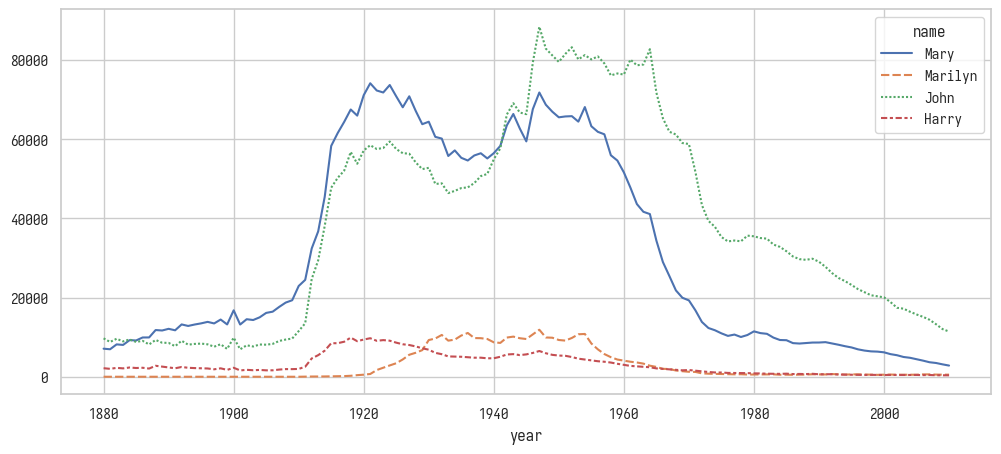

In [14]:
plt.figure(figsize=(12,5))
sns.lineplot(data=subset)

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

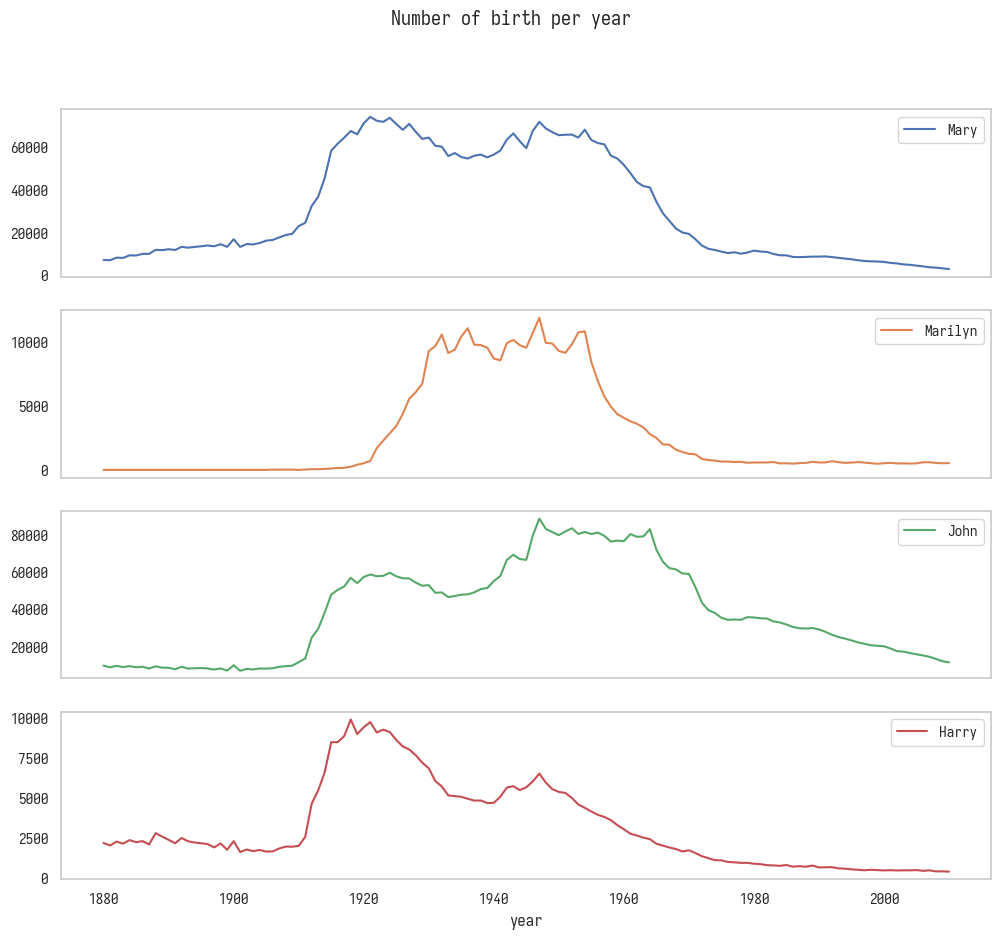

In [15]:
subset.plot(subplots=True, figsize = (12,10), grid = False,
            title = "Number of birth per year")

### 3.2 top1k名字占比变化

In [16]:
prop_change = top_1k.pivot_table('nameProp','year','sex','sum')
prop_change

sex,F,M
year,,
1880,1.0,0.997375
1881,1.0,1.0
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


Text(0.5, 1.0, 'top1k名字占比')

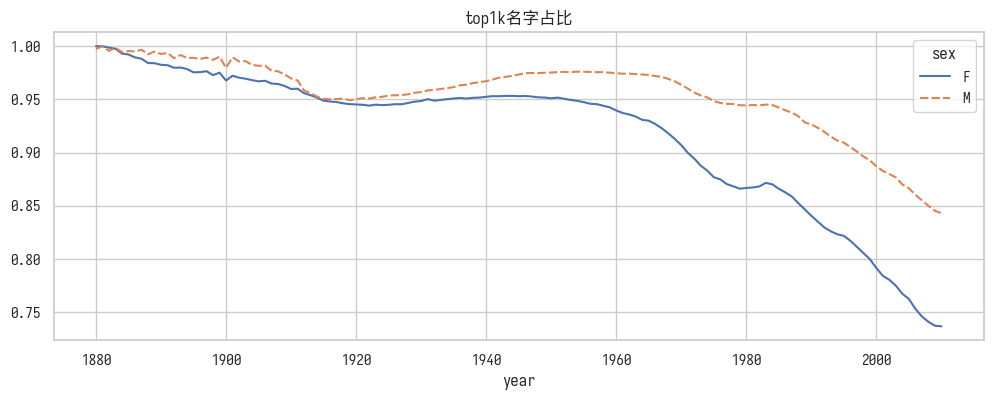

In [17]:
plt.figure(figsize=(12,4))
sns.lineplot(data = prop_change)
plt.title('top1k名字占比')

top1k名字占比下降，说明名字的多样性提升了
### 3.3 出生人口前50%拥有的独特名字数量

In [18]:
# 切片测试
test = top_1k[(top_1k.sex =='F')& (top_1k.year == 2010)]
test

,year,sex,name,births,nameProp
259877,2010,F,Isabella,22731,0.012923
259878,2010,F,Sophia,20477,0.011641
259879,2010,F,Emma,17179,0.009766
259880,2010,F,Olivia,16860,0.009585
259881,2010,F,Ava,15300,0.008698
...,...,...,...,...,...
260872,2010,F,Violeta,250,0.000142
260873,2010,F,Leilah,250,0.000142
260874,2010,F,Alaysia,250,0.000142
260875,2010,F,Dania,249,0.000142


In [19]:
# 占人口的累计比重
prop_cumsum = test.sort_values(by = 'nameProp', ascending= False).nameProp.cumsum()
prop_cumsum.head(20)

259877    0.012923
259878    0.024564
259879     0.03433
259880    0.043915
259881    0.052613
259882     0.06067
259883    0.068699
259884     0.07613
259885    0.082756
259886    0.088749
259887    0.094578
259888    0.100339
259889    0.105908
259890    0.110863
259891    0.115601
259892    0.120252
259893    0.124743
259894    0.129062
259895    0.133024
259896    0.136966
Name: nameProp, dtype: object

In [20]:
# 前50% 拥有的名字数
prop_cumsum.values.searchsorted(0.5) + 1

np.int64(246)

In [21]:
def get_nameNum(df, q = 0.5):
    df = df.sort_values(by = 'nameProp', ascending= False).nameProp.cumsum()
    return df.values.searchsorted(q) + 1
diversity = top_1k.groupby(['year', 'sex']).apply(get_nameNum)
diversity = diversity.unstack()
diversity.head(10)

C:\Users\馨馨\AppData\Local\Temp\ipykernel_20260\198389493.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top_1k.groupby(['year', 'sex']).apply(get_nameNum)


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

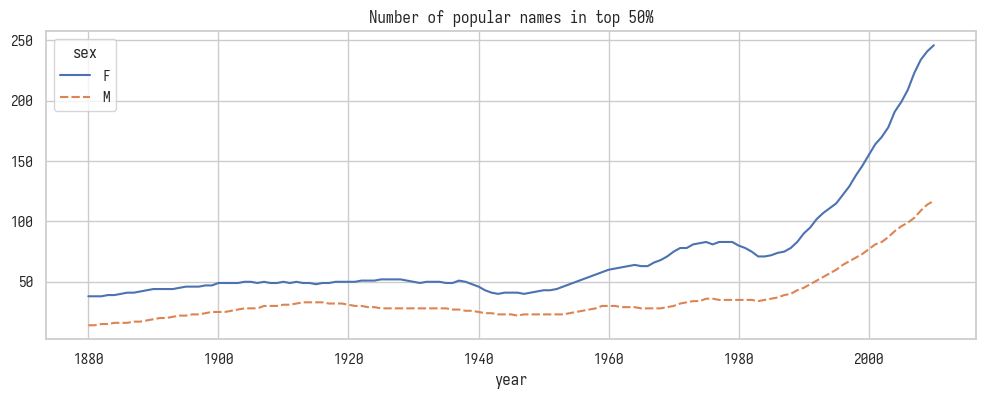

In [22]:
plt.figure(figsize=(12,4))
plt.title('Number of popular names in top 50%')
sns.lineplot(diversity)

### 3.4 最后一个字母 革命

In [23]:
bNames['last_letter'] = bNames.name.str[-1]
bNames

,name,sex,births,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,e
1690780,Zyonne,M,5,2010,e
1690781,Zyquarius,M,5,2010,s
1690782,Zyran,M,5,2010,n


#### 3.4.1 最后一字母占比（1910,1960,2010）

In [24]:
pd.set_option('future.no_silent_downcasting', True)
llNames = bNames.pivot_table('births','last_letter', ['sex','year'],'sum').fillna(0)
llNames.head(10).iloc[:,:10]

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59442   
b                0      0      0      0      0      0      0      0      0   
c                0      0      5      5      0      0      0      0      0   
d              609    607    734    810    916    862   1007   1027   1298   
e            33378  34080  40399  41914  48089  49616  53884  54353  66750   
f                0      0      0      0      0      0      0      0      0   
g                7      5     12      8     24     11     18     25     44   
h             4863   4784   5567   5701   6602   6624   7146   7141   8630   
i               61     78     81     76     84     92     85    105    141   
j                0      0      0      0      0      0      0      0      0   

sex                 
year          1889  
last_letter         
a            58631  
b                0  
c                0  
d             1374  
e            66663  
f                0  
g               28  
h             8826  
i              134  
j                0

In [25]:
# 取其中一些年份进行分析
sub_llNames = llNames.reindex(columns=[1910,1960,2010], level='year')
sub_llNames

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b                 0     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012
f                 0      20      97    152    9224    2255
g                57     318     657    437   20235    2666
h             20427   73247  133424   8848   80841   98090
i               605   80812   55820    164    1286   42956
j                 0       0     159      0       0    1459
k                48     315     626   7104  105315   35198
l             17121   68482   46360  12626  223716  133583
m               476   17417    4552  11272   72139   46808
n             31412  264258  246631  27851  325266  688677
o               658    4932    2187   3314   27358   81025
p                 7      47      35    616   12102    2409
q                 0       0      53      0       0     342
r              5308   13677   31707  12522   66183  166064
s             15477   25810   23451  25404  219080  123670
t             10877   30738   13773  14153  140015   43398
u               271    1161     734     24     122    2318
v                 0     122     205     22      78    2723
w                 8      63    2080   1229   16444   30656
x                 6      74    1279    770    3947   16352
y             43991  308504  205501  15021  343318  110425
z               967    1333    1238     33     392    3476

In [26]:
ll_prop = sub_llNames / sub_llNames.sum()
ll_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a             0.27339  0.341853   0.38124  0.005031   0.00244   0.01498
b                 0.0  0.000343  0.000256  0.002116  0.001834   0.02047
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 0.0   0.00001  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374   0.00225  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907   0.05167
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 0.0       0.0   0.00009       0.0       0.0  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n             0.07924  0.130687   0.14021  0.143415  0.152522  0.362771
o             0.00166  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023   0.00002  0.003172  0.005675  0.001269
q                 0.0       0.0   0.00003       0.0       0.0   0.00018
r             0.01339  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815   0.10273  0.065145
t            0.027438  0.015201   0.00783  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 0.0   0.00006  0.000117  0.000113  0.000037  0.001434
w             0.00002  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704   0.00017  0.000184  0.001831

In [27]:
ll_prop['F'].stack().reset_index()

,last_letter,year,0
0,a,1910,0.27339
1,a,1960,0.341853
2,a,2010,0.38124
3,b,1910,0.0
4,b,1960,0.000343
...,...,...,...
73,y,1960,0.152569
74,y,2010,0.116828
75,z,1910,0.002439
76,z,1960,0.000659


C:\Users\馨馨\AppData\Local\Temp\ipykernel_20260\1658704940.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ll = ll_prop.stack().stack().reset_index()


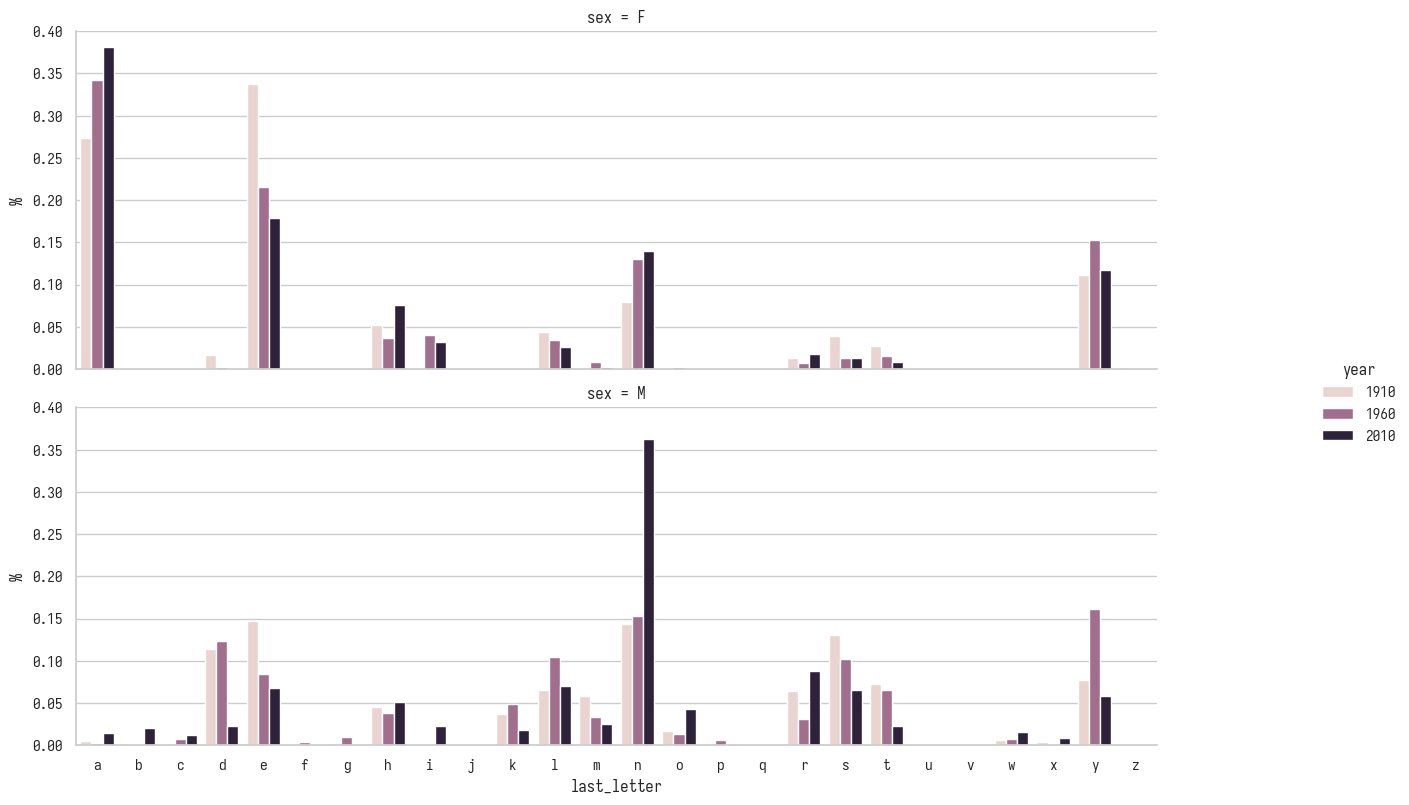

In [28]:
ll = ll_prop.stack().stack().reset_index()
fig = sns.catplot(ll, kind='bar', x = 'last_letter', y = 0, hue='year', row='sex')
fig.figure.set_size_inches(16,8)    #! catplot只有这种方式才能改变画布大小
fig.set_ylabels('%')

Text(0.5, 1.0, 'Male')

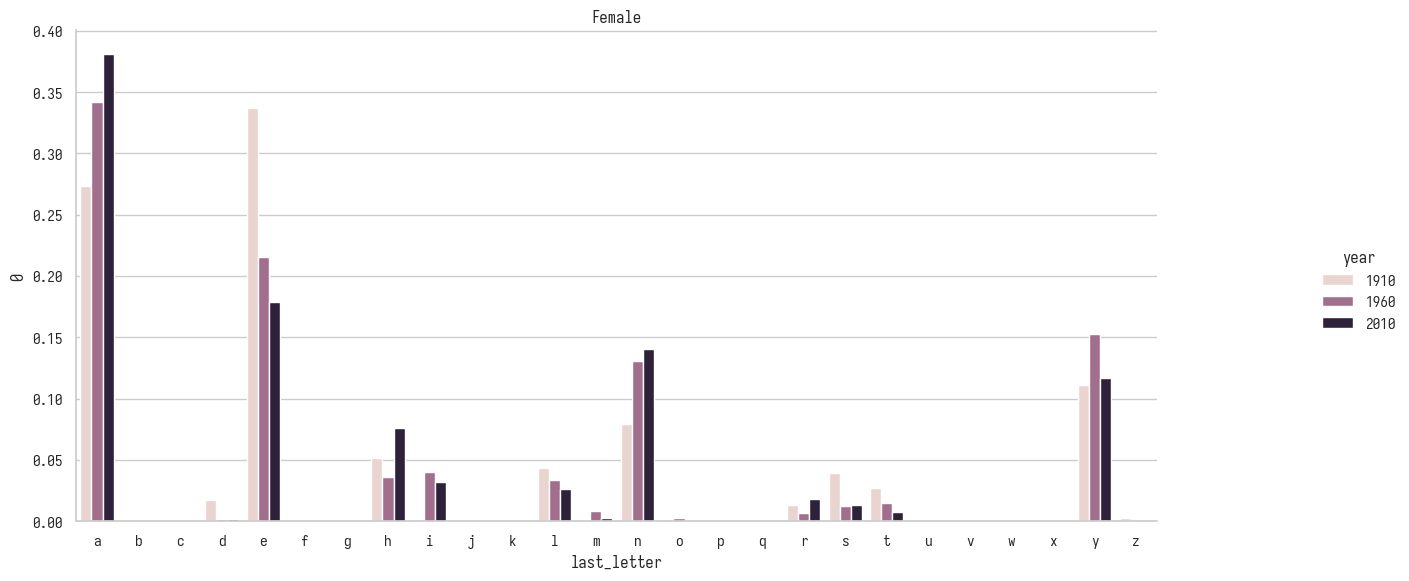

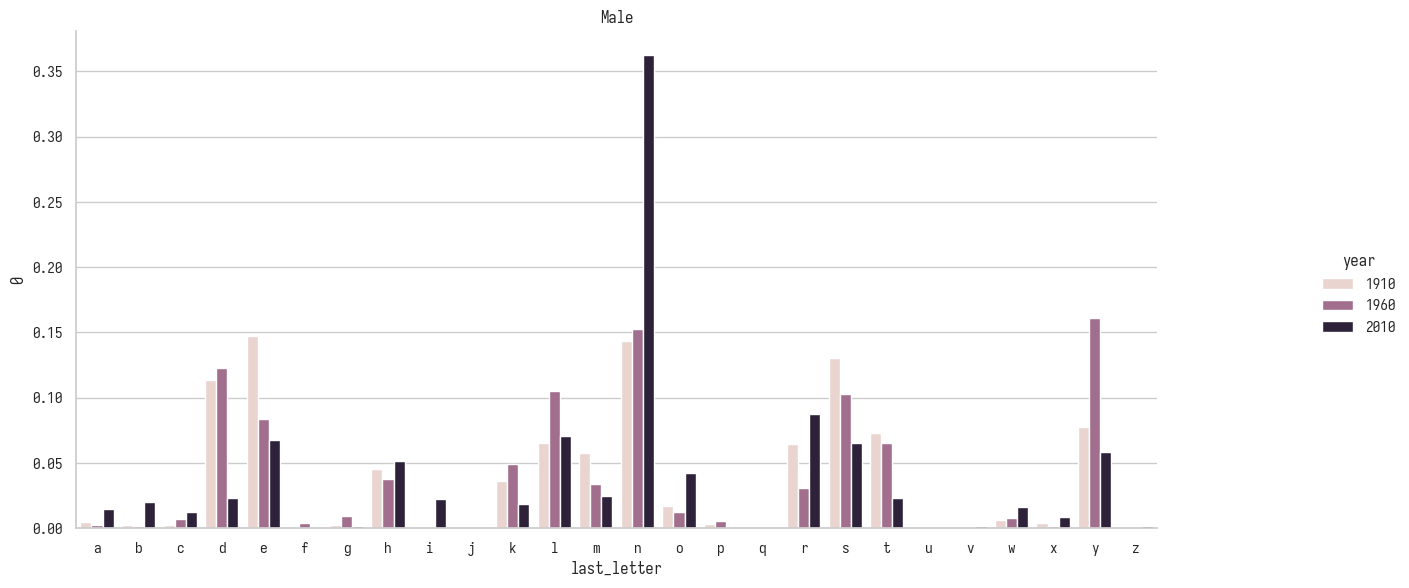

In [29]:
llF = ll_prop['F'].stack().reset_index()
llM = ll_prop['M'].stack().reset_index()

figF = sns.catplot(llF, kind='bar', x = 'last_letter', y = 0, hue='year')
figF.figure.set_size_inches(16,6)
plt.title('Female')
figM = sns.catplot(llM, kind='bar', x = 'last_letter', y = 0, hue='year')
figM.figure.set_size_inches(16,6)
plt.title('Male')

#### 3.4.2 最后一字母变化趋势

In [30]:
trend = llNames / llNames.sum()
trend = trend.loc[list('dny'),'F'].T
trend

last_letter,d,n,y
year,,,
1880,0.006693,0.033057,0.115053
1881,0.006601,0.032179,0.113142
1882,0.006806,0.033157,0.112609
1883,0.007211,0.034161,0.107397
1884,0.0071,0.034932,0.107866
...,...,...,...
2006,0.001898,0.133595,0.119109
2007,0.00175,0.138101,0.118052
2008,0.00172,0.142072,0.11918


<Axes: xlabel='year'>

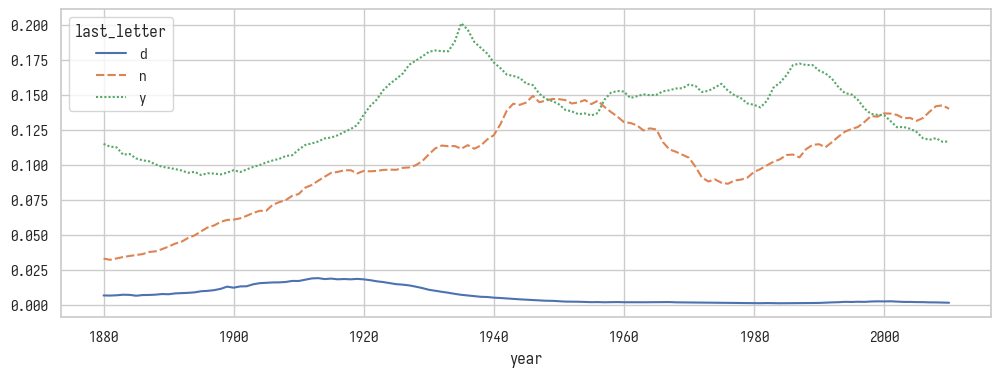

In [31]:
plt.figure(figsize=(12,4))
sns.lineplot(trend)

### 3.5 名字性别偏好转变

In [32]:
all_names = pd.Series(top_1k.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [33]:
top_1k[top_1k.name.isin(lesley_like)].groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: object

In [34]:
change = top_1k[top_1k.name.isin(lesley_like)].pivot_table('births','year','sex','sum').fillna(0)
change = change.div(change.sum(1),axis = 0)
change

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.05303,0.94697
1884,0.107143,0.892857
...,...,...
2006,1.0,0.0
2007,1.0,0.0
2008,1.0,0.0


<Axes: xlabel='year'>

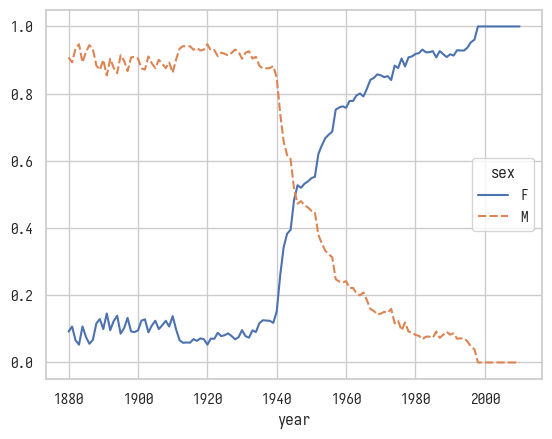

In [35]:
sns.lineplot(change)

### 3.6 Alice数量变化

In [36]:
alice = bNames[bNames.name =='Alice'].iloc[:,:4]
alice

,name,sex,births,year
7,Alice,F,1414,1880
2009,Alice,F,1308,1881
3647,Alice,M,7,1881
3942,Alice,F,1542,1882
6072,Alice,F,1488,1883
...,...,...,...,...
1518799,Alice,F,841,2006
1552801,Alice,F,946,2007
1587664,Alice,F,1022,2008
1622601,Alice,F,1267,2009


<Axes: xlabel='year', ylabel='births'>

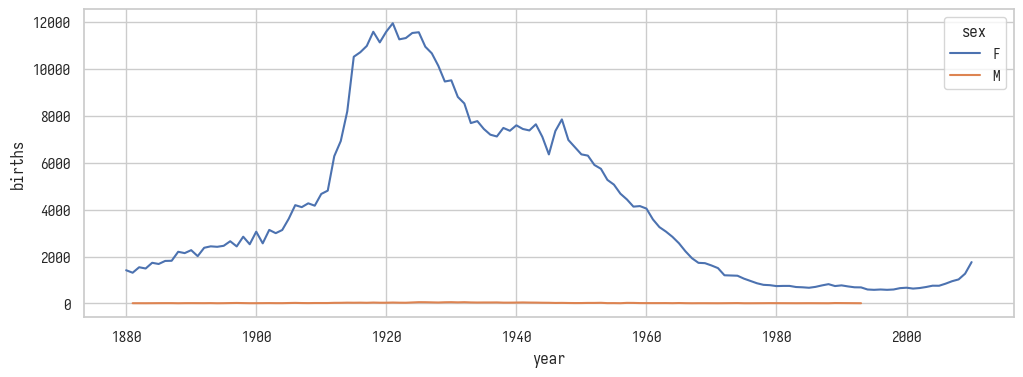

In [37]:
plt.figure(figsize=(12,4))
sns.lineplot(alice,x='year', y='births', hue='sex')

## 4.其他分析

In [38]:
bNames

,name,sex,births,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,e
1690780,Zyonne,M,5,2010,e
1690781,Zyquarius,M,5,2010,s
1690782,Zyran,M,5,2010,n


### 4.1 每年最流行的名字

In [39]:
def top1(df):
    return df.sort_values(by = 'births' ,ascending = False)[:1]
top = bNames.groupby(['year','sex']).apply(top1).iloc[:,:4]
top = top.reset_index(drop= True)
top

C:\Users\馨馨\AppData\Local\Temp\ipykernel_20260\3170511176.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top = bNames.groupby(['year','sex']).apply(top1).iloc[:,:4]


,name,sex,births,year
0,Mary,F,7065,1880
1,John,M,9655,1880
2,Mary,F,6919,1881
3,John,M,8769,1881
4,Mary,F,8149,1882
...,...,...,...,...
257,Jacob,M,22507,2008
258,Isabella,F,22222,2009
259,Jacob,M,21036,2009
260,Isabella,F,22731,2010


### 4.2 哪些年份流行趋势发生变化

In [40]:
# 流行趋势什么时候开始变化
# top['last_trend'] = top[top['year'] -1]['name']
top['past_trend'] = top.groupby('sex')['name'].shift(1)
top['trend_change'] = (top.name != top.past_trend)
top

,name,sex,births,year,past_trend,trend_change
0,Mary,F,7065,1880,NaN,True
1,John,M,9655,1880,NaN,True
2,Mary,F,6919,1881,Mary,False
3,John,M,8769,1881,John,False
4,Mary,F,8149,1882,Mary,False
...,...,...,...,...,...,...
257,Jacob,M,22507,2008,Jacob,False
258,Isabella,F,22222,2009,Emma,True
259,Jacob,M,21036,2009,Jacob,False
260,Isabella,F,22731,2010,Isabella,False


In [41]:
# 哪些年份流行趋势发生变化
top[top.trend_change == True]

,name,sex,births,year,past_trend,trend_change
0,Mary,F,7065,1880,NaN,True
1,John,M,9655,1880,NaN,True
89,Robert,M,60804,1924,John,True
121,James,M,62454,1940,Robert,True
134,Linda,F,99651,1947,Mary,True
146,Mary,F,64325,1953,Linda,True
147,Robert,M,86081,1953,James,True
149,Michael,M,88462,1954,Robert,True
161,David,M,85917,1960,Michael,True
163,Michael,M,86898,1961,David,True


### 4.3 圣经中的人名
#### 4.3.1 圣经中的人名导入

In [42]:
BibleNames = pd.read_table(r'..\Datasets\bibleNames.dat',sep = ' - ',
                           header=None,names = ['name', 'describe'])
BibleNames

C:\Users\馨馨\AppData\Local\Temp\ipykernel_20260\210574892.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  BibleNames = pd.read_table(r'..\Datasets\bibleNames.dat',sep = ' - ',


,name,describe
0,Abel,"Breath, Vanity"
1,Abraham,Father of a Multitude
2,Adam,"Earth, Man"
3,Ahab,"Uncle, Brother of the Father"
4,Amos,"Burden, Burden-bearer"
...,...,...
323,Zerubbabel,"""born in Babylon"" or ""seed of Babylon"""
324,Ziba,"""posture"" or ""station"""
325,Zillah,"""shade"" or ""shadow"""
326,Zimri,"""praiseworthy"" or ""my music"""


#### 4.3.2 名字是否来自圣经

In [43]:
b2bNames =bNames.copy().iloc[:,:4]
# 名字是否来自圣经
b2bNames['fromBible']  = b2bNames.name.isin(BibleNames.name)
b2bNames.describe()

,name,sex,births,year,fromBible
count,1690784,1690784,1690784,1690784,1690784
unique,88496,2,13380,131,2
top,Jesse,F,5,2008,False
freq,262,1003985,235691,35006,1671139


#### 4.3.3 圣经中人名占出生人口比例变化趋势

In [44]:
b_ratio_cal = b2bNames.groupby(['year','sex']).agg(
    {'births':'sum', 'fromBible':'sum'}
).reset_index()
b_ratio_cal['bibleRatio'] = b_ratio_cal.fromBible / b_ratio_cal.births * 100
b_ratio_cal

,year,sex,births,fromBible,bibleRatio
0,1880,F,90993,26,0.028574
1,1880,M,110493,64,0.057922
2,1881,F,91955,27,0.029362
3,1881,M,100748,60,0.059555
4,1882,F,107851,28,0.025962
...,...,...,...,...,...
257,2008,M,2032310,143,0.007036
258,2009,F,1827643,84,0.004596
259,2009,M,1973359,140,0.007095
260,2010,F,1759010,83,0.004719


<Axes: xlabel='year', ylabel='bibleRatio'>

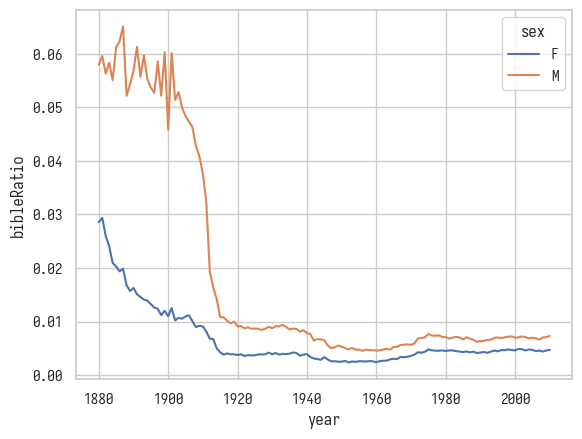

In [45]:
sns.lineplot(b_ratio_cal, x = 'year', y= 'bibleRatio', hue='sex')

#### 4.3.4 持续流行的圣经名字
##### 4.3.4.1 持续流行的圣经名字(可能有间断)

In [46]:
duration = b2bNames[b2bNames.fromBible == 1].groupby('name')\
                    .agg({'year':['min','max'], 'births':'sum'})
duration['during'] = (duration[('year','max')] - duration[('year','min')]) + 1
duration.columns = ['start_year', 'end_year', 'births','during']

# 流行10年以上且总数大于1万 (可能有间断)
duration = duration[ (duration.during > 10) & (duration.births > 10000)]  
duration.sort_values(['during','births'],ascending=[False,False])

,start_year,end_year,births,during
name,,,,
John,1880,2010,5061897,131
Mary,1880,2010,4119074,131
David,1880,2010,3538748,131
Joseph,1880,2010,2529809,131
Daniel,1880,2010,1818134,131
...,...,...,...,...
Demetrius,1912,2010,33059,99
Jude,1912,2010,18186,99
Noe,1914,2010,18028,97


##### 4.3.4.2 持续流行的圣经名字(没有间断)

In [47]:
continuous = bNames.sort_values(['name','year','sex']).iloc[:,:4]

diff = continuous.groupby(['name','sex'])['year'].diff().fillna(0)
continuous['diff'] =  diff

#！ 按name，sex将name持续流行的期间编号
continuous['period_id'] = (diff > 1).cumsum()

# 获取name持续流行的年数并取得最大值
continuous = continuous.groupby(['name','sex','period_id'])['period_id'].agg('count')
continuous = pd.DataFrame(continuous)
continuous.columns = ['period']
continuous = continuous.reset_index().groupby(['name','sex'])\
                        .agg({'period':'max'}).reset_index()
continuous.columns = ['name','sex','max_period']
continuous

,name,sex,max_period
0,Aaban,M,2
1,Aabid,M,1
2,Aabriella,F,1
3,Aadam,M,9
4,Aadan,M,4
...,...,...,...
98143,Zyshonne,M,6
98144,Zytavious,M,4
98145,Zyvion,M,1
98146,Zyyanna,F,1


In [48]:
continuous[continuous.max_period > 100]\
            .sort_values(['max_period','sex','name'],ascending=[False,True,True])\
            .set_index('name')

,sex,max_period
name,,
Adela,F,131
Adelaide,F,131
Adelia,F,131
Adella,F,131
Agatha,F,131
...,...,...
Trinidad,M,101
Tyrus,M,101
Valentino,M,101


### 4.4 最冷门和最热门的名字

In [ ]:
bNames.iloc[:,:4].groupby(['name']).agg({'births':'sum'}).fillna(0)\
                .sort_values('births',ascending=False)

,births
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074
...,...
Kloye,5
Klowey,5
Klifton,5


### 4.5 历年中性名字
> 男女比例差距很小的名字

In [53]:
sexDiff = bNames.iloc[:,:4].pivot_table('births',['year','name'],'sex','sum').fillna(0.01)
sexDiff = sexDiff.F / sexDiff.M
sexDiff = sexDiff[(sexDiff > 0.98) & (sexDiff < 1.02)]
sexDiff.reset_index()

,year,name,0
0,1880,Erie,1.0
1,1880,Jewel,1.0
2,1880,Sammie,1.0
3,1881,Bird,1.0
4,1881,Theo,1.0
...,...,...,...
3009,2010,Yi,1.0
3010,2010,Zabdi,1.0
3011,2010,Zacaria,1.0
3012,2010,Zani,1.0
